In [1]:
import numpy as np
import pandas as pd
import math
import srd

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
df1 = p_m = pd.read_csv('p_metric_29.csv',index_col=0)
df2 = n_m = pd.read_csv('n_metric_29.csv',index_col=0)

In [4]:
ref1 = 'max'
ref2 = 'min'

In [31]:
srd_collector1=[]
for ref1 in df1.columns:
    srd_current=srd.srd_core(df1,ref1)
    srd_collector1.append(srd_current)

srd_collector1=pd.DataFrame(srd_collector1)
srd_collector1 = srd_collector1.iloc[::-1]
srd_collector1_row = srd_collector1.columns.to_list()[::-1]
srd_collector1_columns = srd_collector1.columns.to_list()

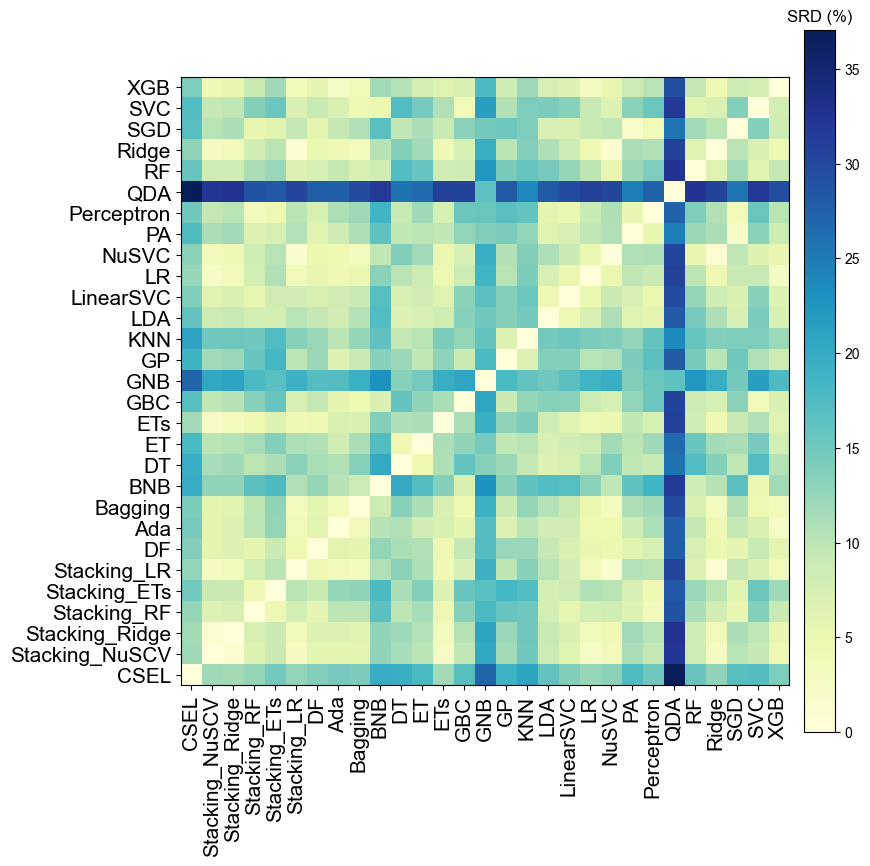

In [39]:
gs = plt.GridSpec(1, 2, width_ratios=(20, 1))

fig = plt.figure(figsize=(8.8, 8.8))

ax = plt.subplot(gs[0, 0])

cmap = plt.get_cmap('YlGnBu')

pc = ax.imshow(srd_collector1, cmap=cmap)

ax.set_xticks(np.arange(len(srd_collector1)))
ax.set_yticks(np.arange(len(srd_collector1)))
ax.set_xticklabels(srd_collector1_columns)
ax.set_yticklabels(srd_collector1_row)


plt.xticks(rotation=90)

ax.tick_params(labelsize=15)

ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
ax.tick_params(axis='x', which='major', bottom=True)
ax.tick_params(axis='y', which='major', left=True)

cax = plt.subplot(gs[0, 1])
plt.colorbar(pc, cax=cax)
plt.title('SRD (%)')

fig.tight_layout()
plt.savefig('Fig2-c.pdf', bbox_inches='tight')
plt.show()